# In class Assignment3: Linear Regression, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression

## Importing the libraries

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing the dataset

In [45]:
dataset=pd.read_csv('Heart.data.csv')

In [3]:
dataset.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         491 non-null    float64
 1   smoking        490 non-null    float64
 2   heart.disease  493 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


## Check out if there any missing value and any categorical column

In [5]:
dataset.isnull().sum()

biking           3
smoking          4
heart.disease    1
dtype: int64

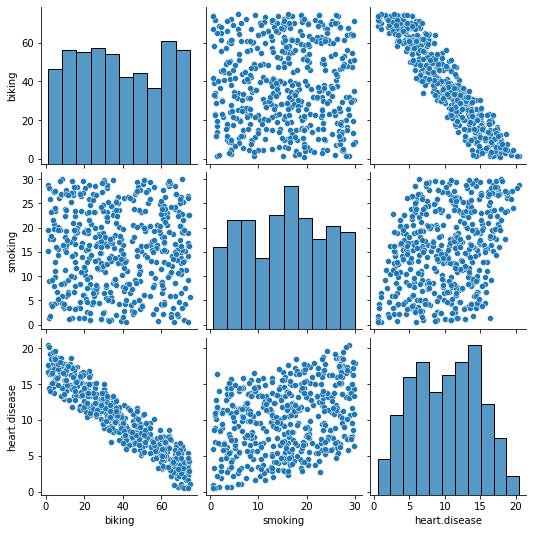

In [8]:
sns.pairplot(dataset)

In [46]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['biking']=imputer.fit_transform(dataset[['biking']])

In [47]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['smoking']=imputer.fit_transform(dataset[['smoking']])

In [48]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['heart.disease']=imputer.fit_transform(dataset[['heart.disease']])

In [12]:
dataset.isnull().sum() #missing values updated

biking           0
smoking          0
heart.disease    0
dtype: int64

## Create different copies of your dataset for using in Linear Regression, SVR, DT, RF

In [49]:
#datasetLR=pd.read_csv('Heart.data.csv')
datasetSVR=dataset
datasetDT=dataset
datasetRF=dataset

## 1. Linear Regression

In [15]:
dataset.columns

Index(['biking', 'smoking', 'heart.disease'], dtype='object')

In [16]:
X=dataset[['biking', 'smoking']]
y=dataset[['heart.disease']]

## Splitting the dataset into the Training set and Test set¶

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Training the Decision Linear Regression model on the Training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [19]:
y_pred=regressor.predict(X_test)

## validation dataset
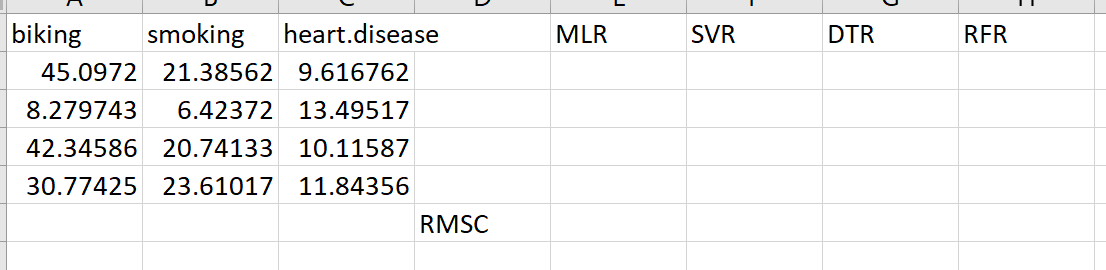!
Fill up the excel

In [21]:
#Case1
regressor.predict([[45.0972,21.38562]])

array([[9.78607384]])

In [22]:
#Case2
regressor.predict([[8.279743,6.42372]])

array([[14.45960334]])

In [23]:
#Case3
regressor.predict([[42.34586,20.74133]])

array([[10.22212514]])

In [24]:
#Case4
regressor.predict([[30.77425,23.61017]])

array([[13.07809314]])

## Evaluating the Model Performance using r2score and rmsc

In [25]:
from sklearn.metrics import r2_score
print('R-Square', r2_score(y_test,y_pred))

R-Square 0.9645932313773842


In [33]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
rms=sqrt(mse(y_test,y_pred))
print('The root mean squared error is',rms)

The root mean squared error is 0.8100676706450335


# 2. Support Vector Regressor

## Selecting the copied dataset

In [78]:
X=datasetSVR[['biking', 'smoking']]
y=datasetSVR[['heart.disease']]

## Splitting the dataset into the Training set and Test set

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Feature Scaling:- X_train and y_train
- X_train = sc_X.fit_transform(X_train)
- y_train = sc_y.fit_transform(y_train)

In [80]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [81]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train, y_train)   

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the Test set results

In [82]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))


## Validation dataset
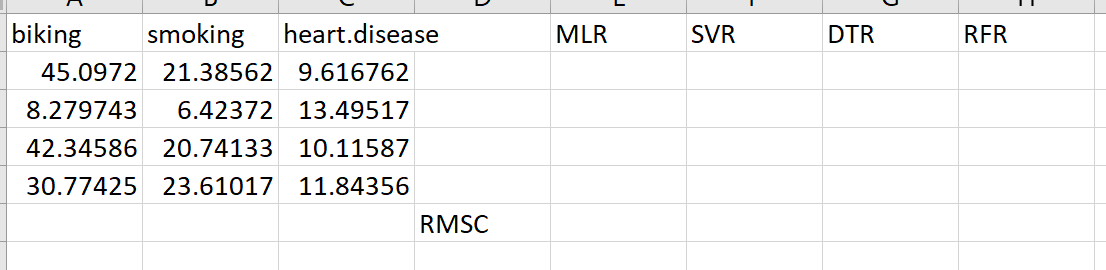
Fill up the excel

In [83]:
#Case1 check the sample
sc_y.inverse_transform(regressor.predict(sc_X.transform([[45.092, 21.385]])).reshape(-1,1))

array([[9.62031281]])

In [84]:
#Case2
sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.279743,6.42372]])).reshape(-1,1))

array([[14.58805851]])

In [85]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[42.34586,20.74133]])).reshape(-1,1))

array([[10.04177762]])

In [86]:
#Case4
sc_y.inverse_transform(regressor.predict(sc_X.transform([[30.77425,23.61017]])).reshape(-1,1))

array([[13.00723833]])

## Evaluating the Model Performance using r2score and rmsc

In [87]:
from sklearn.metrics import r2_score
print('R-Square', r2_score(y_test,y_pred))

R-Square 0.9641038376758165


In [88]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
rms=sqrt(mse(y_test,y_pred))
print('The root mean squared error is',rms)

The root mean squared error is 0.8156468509619346


## 3. Decision Tree Regression

##  Selecting the copied dataset

In [89]:
X=datasetDT[['biking', 'smoking']]
y=datasetDT[['heart.disease']]

## Splitting the dataset into the Training set and Test set

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Training the Decision Tree Regression model on the Training set

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
regressor=DecisionTreeRegressor(random_state=0) 
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [101]:
y_pred=regressor.predict(X_test)

## Validation dataset
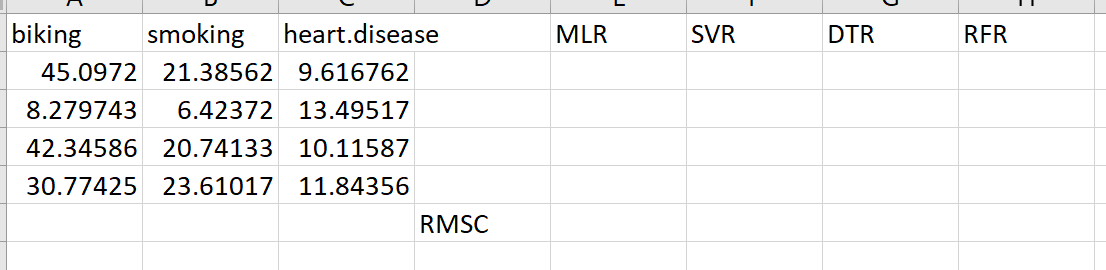
Fill up the excel

In [102]:
#Case1
regressor.predict([[45.0972,21.38562]])

array([9.79848336])

In [103]:
#Case2
regressor.predict([[8.279743,6.42372]])

array([14.44377369])

In [104]:
#Case3
regressor.predict([[42.34586,20.74133]])

array([11.43351131])

In [105]:
#Case4
regressor.predict([[30.77425,23.61017]])

array([13.50761916])

## Evaluating the Model Performance using r2score and rmsc

In [106]:
from sklearn.metrics import r2_score
print('R-Square', r2_score(y_test,y_pred))

R-Square 0.9427897529304868


In [107]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
rms=sqrt(mse(y_test,y_pred))
print('The root mean squared error is',rms)

The root mean squared error is 1.0297103197373925


# 4. Random Forest Regression

## Selecting the copied dataset

In [108]:
X=datasetRF[['biking', 'smoking']]
y=datasetRF[['heart.disease']]

## Splitting the dataset into the Training set and Test set

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Training the Decision Tree Regression model on the Training set

In [110]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20, random_state=0) #en estimators puedo poner lo que quiera
regressor.fit(X_train,y_train)

/var/folders/9c/vdl0n0vj3dvc8lz0g7h6h00w0000gn/T/ipykernel_13025/2817598213.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting the Test set results

In [111]:
y_pred=regressor.predict(X_test)

## Validation dataset
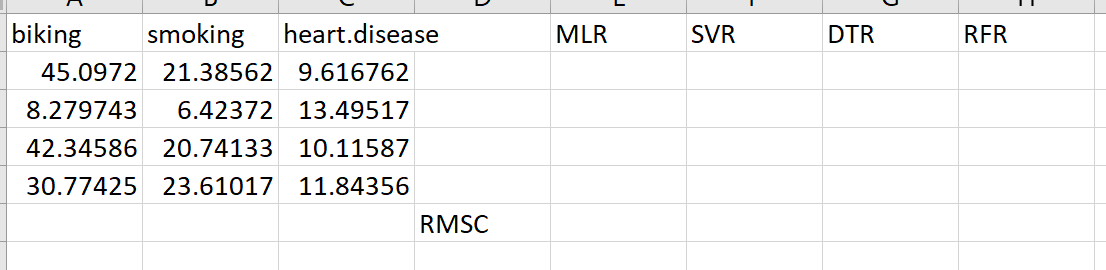

In [112]:
#Case1
regressor.predict([[45.0972,21.38562]])

array([8.65037099])

In [113]:
#Case2
regressor.predict([[8.279743,6.42372]])

array([14.72771743])

In [114]:
#Case3
regressor.predict([[42.34586,20.74133]])

array([9.42295373])

In [115]:
#Case4
regressor.predict([[30.77425,23.61017]])

array([13.27471333])

## Evaluating the Model Performance

In [116]:
from sklearn.metrics import r2_score
print('R-Square', r2_score(y_test,y_pred))

R-Square 0.949006463609505


In [117]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
rms=sqrt(mse(y_test,y_pred))
print('The root mean squared error is',rms)

The root mean squared error is 0.9721554589498472
